In [15]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
from util import Net

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [17]:
data_train = datasets.MNIST(root = "./data/",
                train = True,
                transform = ToTensor(),
                download = True)

data_test = datasets.MNIST(root="./data/",
              transform = ToTensor(),
              train = False,
              download=True)  

In [18]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                        batch_size = 64,
                        shuffle = True)

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                        batch_size = 64,
                        shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


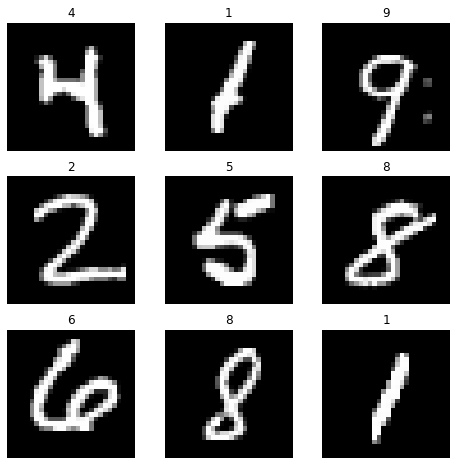

In [19]:
train_features, train_labels = next(iter(data_loader_train))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data_train), size=(1,)).item()
    img, label = data_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
model = Net().to(device)

In [21]:
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        optimizer.zero_grad()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item() / len(X), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    correct /= size
    print(f"train Accuracy: {(100*correct):>0.1f}%\n")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [23]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(data_loader_train, model, loss_fn, optimizer)
    test(data_loader_test, model, loss_fn)
print("Done!")

model_path = './model/mnist_classifier'
torch.save(model, model_path)

Epoch 1
-------------------------------
loss: 0.035989  [    0/60000]
loss: 0.001112  [ 6400/60000]
loss: 0.001849  [12800/60000]
loss: 0.001002  [19200/60000]
loss: 0.001662  [25600/60000]
loss: 0.002955  [32000/60000]
loss: 0.001407  [38400/60000]
loss: 0.002417  [44800/60000]
loss: 0.001493  [51200/60000]
loss: 0.003152  [57600/60000]
train Accuracy: 96.2%

Test Error: 
 Accuracy: 98.9%, Avg loss: 0.000620 

Epoch 2
-------------------------------
loss: 0.000161  [    0/60000]
loss: 0.000074  [ 6400/60000]
loss: 0.000195  [12800/60000]
loss: 0.002547  [19200/60000]
loss: 0.000649  [25600/60000]
loss: 0.000026  [32000/60000]
loss: 0.000144  [38400/60000]
loss: 0.001235  [44800/60000]
loss: 0.000350  [51200/60000]
loss: 0.000144  [57600/60000]
train Accuracy: 98.9%

Test Error: 
 Accuracy: 99.0%, Avg loss: 0.000538 

Epoch 3
-------------------------------
loss: 0.000706  [    0/60000]
loss: 0.000016  [ 6400/60000]
loss: 0.000014  [12800/60000]
loss: 0.000148  [19200/60000]
loss: 0.00

In [24]:
model_path = './model/mnist_classifier'

minist_classifier = torch.load(model_path)
minist_classifier.eval()

Net(
  (cnn): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

predict: 7 label: 7
predict: 9 label: 9
predict: 7 label: 7
predict: 9 label: 9
predict: 5 label: 5
predict: 7 label: 7
predict: 7 label: 7
predict: 5 label: 5
predict: 7 label: 7


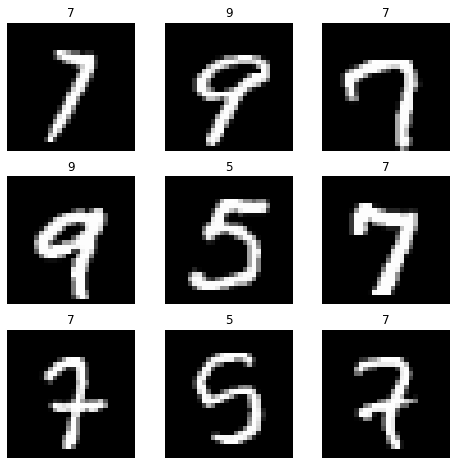

In [25]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data_train), size=(1,)).item()
    img, label = data_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    pred =  minist_classifier(img.unsqueeze(0).to(device))
    print('predict:', torch.argmax(pred).item(), 'label:', label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()